**using the fine-tuned model to do the modeling and evaluation**

In [0]:
#from google.colab import drive
#drive.mount('/content/drive')

In [0]:
#%cd /content/drive/My\ Drive/ds4ba_code
#%ls

/content/drive/My Drive/ds4ba_code
 billboard_data_retrieval.ipynb
 Copy_of_modeling_and_evaluation_with_correct_genres_anisha.ipynb
 data_cleaning_basic_model.ipynb
 modeling_and_evaluation_with_correct_genres.ipynb
 modeling.ipynb
 models/
'parameter tuning'/
 spotify-data-from-api/
 spotify_data_retrieval_final.ipynb
'spotify data retrieval.ipynb'
 SpotifyFeatures.csv
 the-spotify-hit-predictor-dataset/


In [0]:
import pandas as pd
import numpy as np
import math

## A little more data processing

### convert numerical "popularity" to binary "pop"
This is to compare the result for "hot".

In [0]:
# df = pd.read_csv('spotify-data-from-api/dataset_genre_processed_with_track_id_before_scaling.csv')
# df

,track_id,month,artist_followers,popularity,hot,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,genre_acoustic,genre_blues,genre_country,genre_folk,genre_jazz,genre_rock,genre_pop,genre_guitar,genre_soul,genre_funk,genre_j-pop,genre_indie-pop,genre_dance,genre_punk,genre_metal,genre_classical,genre_opera,genre_groove,genre_disco,genre_electro,genre_electronic,genre_hip-hop,genre_hard-rock,genre_samba,genre_spanish,genre_tango,genre_k-pop,genre_club,genre_party,genre_salsa,genre_heavy-metal,genre_latino,genre_mandopop,genre_romance,genre_rock-n-roll
0,3htW4Ky3zoDU1KZGxVLfhz,722,10756,18,0,0.955,0.465,291307,0.1020,0.000002,1,0.0867,-16.101,1,0.0473,118.543,4,0.117,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,7KwwQHmnE9xEYMRLufyIc5,722,10756,8,0,0.994,0.571,178053,0.1500,0.521000,8,0.1080,-18.083,0,0.0807,81.006,4,0.450,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,6KBqm3BWRkSDG5bomPV8ds,722,10756,7,0,0.897,0.495,248853,0.1200,0.000003,6,0.3700,-18.490,1,0.0426,146.739,3,0.382,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0EsfKq0tOPvrp4Vl8JrJ5n,722,10756,9,0,0.989,0.445,221960,0.0318,0.017100,2,0.0969,-27.998,1,0.0471,117.876,4,0.255,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4XOvmBNV0b9Y7t4pBPLWFu,722,10756,5,0,0.992,0.571,200827,0.0441,0.178000,5,0.1160,-22.541,1,0.0598,118.877,4,0.465,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1317497,15I5b3AC3UolVUCV5qTkz0,4,314,3,0,0.619,0.543,252883,0.4590,0.000034,2,0.0380,-8.310,0,0.0597,113.307,4,0.488,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1317498,1lmSy5kCZn5WCMzoCy76J2,4,314,3,0,0.599,0.638,214860,0.3380,0.734000,2,0.0440,-8.699,0,0.0492,114.150,4,0.371,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1317499,3NO7ZFvCQpStojfFvQZXJA,4,314,3,0,0.555,0.542,261968,0.2870,0.575000,11,0.0576,-9.923,0,0.0554,112.956,4,0.440,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1317500,46Jrm8aOcTMMPbDocEPFYI,4,314,3,0,0.684,0.554,228972,0.3290,0.000015,0,0.1210,-9.758,0,0.0398,111.981,4,0.378,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [0]:
# df.drop(columns='track_id', inplace=True)
# df

,month,artist_followers,popularity,hot,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,genre_acoustic,genre_blues,genre_country,genre_folk,genre_jazz,genre_rock,genre_pop,genre_guitar,genre_soul,genre_funk,genre_j-pop,genre_indie-pop,genre_dance,genre_punk,genre_metal,genre_classical,genre_opera,genre_groove,genre_disco,genre_electro,genre_electronic,genre_hip-hop,genre_hard-rock,genre_samba,genre_spanish,genre_tango,genre_k-pop,genre_club,genre_party,genre_salsa,genre_heavy-metal,genre_latino,genre_mandopop,genre_romance,genre_rock-n-roll
0,722,10756,18,0,0.955,0.465,291307,0.1020,0.000002,1,0.0867,-16.101,1,0.0473,118.543,4,0.117,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,722,10756,8,0,0.994,0.571,178053,0.1500,0.521000,8,0.1080,-18.083,0,0.0807,81.006,4,0.450,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,722,10756,7,0,0.897,0.495,248853,0.1200,0.000003,6,0.3700,-18.490,1,0.0426,146.739,3,0.382,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,722,10756,9,0,0.989,0.445,221960,0.0318,0.017100,2,0.0969,-27.998,1,0.0471,117.876,4,0.255,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,722,10756,5,0,0.992,0.571,200827,0.0441,0.178000,5,0.1160,-22.541,1,0.0598,118.877,4,0.465,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1317497,4,314,3,0,0.619,0.543,252883,0.4590,0.000034,2,0.0380,-8.310,0,0.0597,113.307,4,0.488,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1317498,4,314,3,0,0.599,0.638,214860,0.3380,0.734000,2,0.0440,-8.699,0,0.0492,114.150,4,0.371,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1317499,4,314,3,0,0.555,0.542,261968,0.2870,0.575000,11,0.0576,-9.923,0,0.0554,112.956,4,0.440,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1317500,4,314,3,0,0.684,0.554,228972,0.3290,0.000015,0,0.1210,-9.758,0,0.0398,111.981,4,0.378,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


**We have a very skewed/imbalanced dataset. "hot" for 1.75%.**

In [0]:
# pop_rate = len(df[df['hot'] == 1])/len(df)
# pop_rate

0.017511168863500775

In [0]:
# sorted_df = df.sort_values(by='popularity', ascending=False, ignore_index=True)
# sorted_df

,month,artist_followers,popularity,hot,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,genre_acoustic,genre_blues,genre_country,genre_folk,genre_jazz,genre_rock,genre_pop,genre_guitar,genre_soul,genre_funk,genre_j-pop,genre_indie-pop,genre_dance,genre_punk,genre_metal,genre_classical,genre_opera,genre_groove,genre_disco,genre_electro,genre_electronic,genre_hip-hop,genre_hard-rock,genre_samba,genre_spanish,genre_tango,genre_k-pop,genre_club,genre_party,genre_salsa,genre_heavy-metal,genre_latino,genre_mandopop,genre_romance,genre_rock-n-roll
0,4,19817979,100,1,0.00147,0.513,201573,0.796,0.000209,1,0.0938,-4.075,1,0.0629,171.017,4,0.345,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,5,16162314,98,1,0.01250,0.794,183290,0.793,0.000000,11,0.0952,-4.521,0,0.0842,123.941,4,0.677,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,5,951338,97,1,0.69200,0.824,209438,0.588,0.000104,6,0.1490,-6.400,0,0.0924,98.027,4,0.513,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,1476147,96,1,0.25600,0.787,237893,0.673,0.000004,11,0.0904,-4.577,0,0.1580,110.962,4,0.786,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,318839,96,0,0.05220,0.621,163636,0.601,0.000000,6,0.4600,-5.616,0,0.1480,116.735,5,0.457,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1317497,144,296,0,0,0.96500,0.358,92800,0.238,0.000008,6,0.2540,-12.751,1,0.0639,81.595,4,0.170,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1317498,144,296,0,0,0.96600,0.477,309707,0.428,0.000601,10,0.1000,-8.620,1,0.1260,129.473,4,0.432,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1317499,144,296,0,0,0.94700,0.400,329627,0.320,0.001940,0,0.1200,-12.648,1,0.0525,122.281,4,0.288,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1317500,144,296,0,0,0.98300,0.277,256293,0.361,0.035600,0,0.0730,-11.431,0,0.0372,80.219,4,0.177,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
# popular_index = int(len(sorted_df)*pop_rate)
# popular = sorted_df['popularity'][popular_index]
# popular

56

In [0]:
# sorted_df.loc[sorted_df['popularity'] >= popular, 'pop'] = 1
# sorted_df.loc[sorted_df['popularity'] < popular, 'pop'] = 0
# sorted_df

,month,artist_followers,popularity,hot,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,genre_acoustic,genre_blues,genre_country,genre_folk,genre_jazz,genre_rock,genre_pop,genre_guitar,genre_soul,genre_funk,genre_j-pop,genre_indie-pop,genre_dance,genre_punk,genre_metal,genre_classical,genre_opera,genre_groove,genre_disco,genre_electro,genre_electronic,genre_hip-hop,genre_hard-rock,genre_samba,genre_spanish,genre_tango,genre_k-pop,genre_club,genre_party,genre_salsa,genre_heavy-metal,genre_latino,genre_mandopop,genre_romance,genre_rock-n-roll,pop
0,4,19817979,100,1,0.00147,0.513,201573,0.796,0.000209,1,0.0938,-4.075,1,0.0629,171.017,4,0.345,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0
1,5,16162314,98,1,0.01250,0.794,183290,0.793,0.000000,11,0.0952,-4.521,0,0.0842,123.941,4,0.677,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0
2,5,951338,97,1,0.69200,0.824,209438,0.588,0.000104,6,0.1490,-6.400,0,0.0924,98.027,4,0.513,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0
3,4,1476147,96,1,0.25600,0.787,237893,0.673,0.000004,11,0.0904,-4.577,0,0.1580,110.962,4,0.786,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0
4,5,318839,96,0,0.05220,0.621,163636,0.601,0.000000,6,0.4600,-5.616,0,0.1480,116.735,5,0.457,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1317497,144,296,0,0,0.96500,0.358,92800,0.238,0.000008,6,0.2540,-12.751,1,0.0639,81.595,4,0.170,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
1317498,144,296,0,0,0.96600,0.477,309707,0.428,0.000601,10,0.1000,-8.620,1,0.1260,129.473,4,0.432,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
1317499,144,296,0,0,0.94700,0.400,329627,0.320,0.001940,0,0.1200,-12.648,1,0.0525,122.281,4,0.288,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
1317500,144,296,0,0,0.98300,0.277,256293,0.361,0.035600,0,0.0730,-11.431,0,0.0372,80.219,4,0.177,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0


In [0]:
# sorted_df['pop'] = sorted_df['pop'].astype(int)

In [0]:
# sorted_df['hot'] = sorted_df['hot'].astype(int)

In [0]:
# sorted_df['pop'].value_counts()

0    1292549
1      24953
Name: pop, dtype: int64

In [0]:
# sorted_df['hot'].value_counts()

0    1294431
1      23071
Name: hot, dtype: int64

In [0]:
# 23071/(23071+1294431)

0.017511168863500775

In [0]:
# sorted_df[: 24953]

,month,artist_followers,popularity,hot,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,genre_acoustic,genre_blues,genre_country,genre_folk,genre_jazz,genre_rock,genre_pop,genre_guitar,genre_soul,genre_funk,genre_j-pop,genre_indie-pop,genre_dance,genre_punk,genre_metal,genre_classical,genre_opera,genre_groove,genre_disco,genre_electro,genre_electronic,genre_hip-hop,genre_hard-rock,genre_samba,genre_spanish,genre_tango,genre_k-pop,genre_club,genre_party,genre_salsa,genre_heavy-metal,genre_latino,genre_mandopop,genre_romance,genre_rock-n-roll,pop
0,4,19817979,100,1,0.00147,0.513,201573,0.796,0.000209,1,0.0938,-4.075,1,0.0629,171.017,4,0.345,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,5,16162314,98,1,0.01250,0.794,183290,0.793,0.000000,11,0.0952,-4.521,0,0.0842,123.941,4,0.677,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,5,951338,97,1,0.69200,0.824,209438,0.588,0.000104,6,0.1490,-6.400,0,0.0924,98.027,4,0.513,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,4,1476147,96,1,0.25600,0.787,237893,0.673,0.000004,11,0.0904,-4.577,0,0.1580,110.962,4,0.786,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,5,318839,96,0,0.05220,0.621,163636,0.601,0.000000,6,0.4600,-5.616,0,0.1480,116.735,5,0.457,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24948,173,2943334,56,1,0.08890,0.568,245867,0.838,0.056700,1,0.0994,-6.138,1,0.0266,104.988,4,0.852,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
24949,123,139254,56,0,0.03360,0.490,331440,0.818,0.000000,5,0.3780,-11.976,0,0.2510,81.942,4,0.334,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
24950,27,2420635,56,0,0.41000,0.694,244189,0.472,0.000000,8,0.2330,-8.620,1,0.0281,95.002,4,0.467,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
24951,5,162179,56,0,0.00983,0.563,157832,0.814,0.043700,7,0.0732,-4.219,0,0.0558,140.615,4,0.796,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [0]:
# sorted_df[24953: 24953+10000]

,month,artist_followers,popularity,hot,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,genre_acoustic,genre_blues,genre_country,genre_folk,genre_jazz,genre_rock,genre_pop,genre_guitar,genre_soul,genre_funk,genre_j-pop,genre_indie-pop,genre_dance,genre_punk,genre_metal,genre_classical,genre_opera,genre_groove,genre_disco,genre_electro,genre_electronic,genre_hip-hop,genre_hard-rock,genre_samba,genre_spanish,genre_tango,genre_k-pop,genre_club,genre_party,genre_salsa,genre_heavy-metal,genre_latino,genre_mandopop,genre_romance,genre_rock-n-roll,pop
24953,12,248024,55,0,0.000484,0.461,228736,0.766,0.000057,1,0.0884,-6.875,1,0.0566,169.957,4,0.399,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
24954,28,141735,55,0,0.061400,0.795,182467,0.742,0.000003,0,0.0669,-4.722,1,0.0556,92.002,4,0.267,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
24955,22,15771,55,0,0.560000,0.599,307648,0.826,0.003320,1,0.3310,-2.845,1,0.0390,91.137,4,0.860,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
24956,20,3693065,55,0,0.016300,0.581,228481,0.604,0.032100,10,0.1060,-9.303,0,0.0256,96.970,3,0.208,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
24957,34,1898400,55,0,0.042000,0.846,164773,0.158,0.000041,8,0.0845,-18.191,1,0.4190,139.980,4,0.290,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34948,55,975747,53,0,0.017400,0.476,214067,0.938,0.000111,1,0.3840,-1.446,0,0.2340,105.264,4,0.258,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
34949,90,8300172,53,0,0.001120,0.667,161973,0.902,0.000000,7,0.0624,-4.588,1,0.0988,135.933,4,0.719,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
34950,94,877169,53,0,0.779000,0.476,259080,0.478,0.117000,11,0.1030,-11.766,1,0.0395,89.060,4,0.489,0,0,0,1,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
34951,245,2004008,53,1,0.076900,0.394,256253,0.663,0.006440,0,0.2390,-6.619,1,0.0295,207.575,4,0.737,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
# sorted_df.describe()

,month,artist_followers,popularity,hot,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,genre_acoustic,genre_blues,genre_country,genre_folk,genre_jazz,genre_rock,genre_pop,genre_guitar,genre_soul,genre_funk,genre_j-pop,genre_indie-pop,genre_dance,genre_punk,genre_metal,genre_classical,genre_opera,genre_groove,genre_disco,genre_electro,genre_electronic,genre_hip-hop,genre_hard-rock,genre_samba,genre_spanish,genre_tango,genre_k-pop,genre_club,genre_party,genre_salsa,genre_heavy-metal,genre_latino,genre_mandopop,genre_romance,genre_rock-n-roll,pop
count,1.317502e+06,1.317502e+06,1.317502e+06,1.317502e+06,1.317502e+06,1.317502e+06,1.317502e+06,1.317502e+06,1.317502e+06,1.317502e+06,1.317502e+06,1.317502e+06,1.317502e+06,1.317502e+06,1.317502e+06,1.317502e+06,1.317502e+06,1.317502e+06,1.317502e+06,1.317502e+06,1.317502e+06,1.317502e+06,1.317502e+06,1.317502e+06,1.317502e+06,1.317502e+06,1.317502e+06,1.317502e+06,1.317502e+06,1.317502e+06,1.317502e+06,1.317502e+06,1.317502e+06,1.317502e+06,1.317502e+06,1.317502e+06,1.317502e+06,1.317502e+06,1.317502e+06,1.317502e+06,1.317502e+06,1.317502e+06,1.317502e+06,1.317502e+06,1.317502e+06,1.317502e+06,1.317502e+06,1.317502e+06,1.317502e+06,1.317502e+06,1.317502e+06,1.317502e+06,1.317502e+06
mean,2.167816e+02,6.304383e+05,1.597477e+01,1.751117e-02,4.116768e-01,5.357386e-01,2.486143e+05,5.613691e-01,1.877731e-01,5.223002e+00,2.169327e-01,-1.043480e+01,6.691231e-01,7.668586e-02,1.189426e+02,3.879276e+00,4.968413e-01,2.744436e-02,5.632174e-02,6.257903e-02,5.379802e-02,6.938358e-02,6.957712e-02,7.094259e-02,3.744055e-02,6.192476e-02,5.480068e-02,2.432558e-02,3.764700e-02,5.072706e-02,4.664054e-02,4.443029e-02,5.947467e-02,4.906482e-02,3.056845e-02,4.346711e-02,3.210242e-02,2.719540e-02,4.035136e-02,4.653048e-02,3.078401e-02,4.005307e-02,2.592178e-02,1.564020e-02,4.325610e-03,1.381630e-02,3.290697e-02,4.528266e-03,1.197873e-02,3.919918e-02,4.787849e-03,9.184047e-05,1.893963e-02
std,1.741842e+02,2.268822e+06,1.546507e+01,1.311661e-01,3.742588e-01,1.740816e-01,1.235882e+05,2.801122e-01,3.252116e-01,3.526177e+00,1.981042e-01,5.998761e+00,4.705290e-01,9.267497e-02,2.928430e+01,4.453685e-01,2.643929e-01,1.633744e-01,2.305421e-01,2.422043e-01,2.256188e-01,2.541054e-01,2.544331e-01,2.567290e-01,1.898388e-01,2.410189e-01,2.275909e-01,1.540580e-01,1.903411e-01,2.194399e-01,2.108678e-01,2.060492e-01,2.365111e-01,2.160035e-01,1.721454e-01,2.039062e-01,1.762722e-01,1.626525e-01,1.967820e-01,2.106310e-01,1.727321e-01,1.960838e-01,1.589021e-01,1.240790e-01,6.562700e-02,1.167280e-01,1.783932e-01,6.713989e-02,1.087899e-01,1.940686e-01,6.902846e-02,9.582907e-03,1.363119e-01
min,3.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.090000e-02,1.503300e+04,2.000000e-05,0.000000e+00,0.000000e+00,2.960000e-03,-5.370100e+01,0.000000e+00,2.150000e-02,3.024800e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,7.800000e+01,1.075900e+04,2.000000e+00,0.000000e+00,3.050000e-02,4.140000e-01,1.839330e+05,3.340000e-01,1.200000e-06,2.000000e+00,9.620000e-02,-1.322300e+01,0.000000e+00,3.550000e-02,9.634500e+01,4.000000e+00,2.780000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0

In [0]:
# sorted_df.to_csv('spotify-data-from-api/final_dataset_for_basic_modeling_rerun.csv', index=False)

In [0]:
# sorted_df

,month,artist_followers,popularity,hot,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,genre_acoustic,genre_blues,genre_country,genre_folk,genre_jazz,genre_rock,genre_pop,genre_guitar,genre_soul,genre_funk,genre_j-pop,genre_indie-pop,genre_dance,genre_punk,genre_metal,genre_classical,genre_opera,genre_groove,genre_disco,genre_electro,genre_electronic,genre_hip-hop,genre_hard-rock,genre_samba,genre_spanish,genre_tango,genre_k-pop,genre_club,genre_party,genre_salsa,genre_heavy-metal,genre_latino,genre_mandopop,genre_romance,genre_rock-n-roll,pop
0,4,19817979,100,1,0.00147,0.513,201573,0.796,0.000209,1,0.0938,-4.075,1,0.0629,171.017,4,0.345,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,5,16162314,98,1,0.01250,0.794,183290,0.793,0.000000,11,0.0952,-4.521,0,0.0842,123.941,4,0.677,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,5,951338,97,1,0.69200,0.824,209438,0.588,0.000104,6,0.1490,-6.400,0,0.0924,98.027,4,0.513,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,4,1476147,96,1,0.25600,0.787,237893,0.673,0.000004,11,0.0904,-4.577,0,0.1580,110.962,4,0.786,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,5,318839,96,0,0.05220,0.621,163636,0.601,0.000000,6,0.4600,-5.616,0,0.1480,116.735,5,0.457,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1317497,144,296,0,0,0.96500,0.358,92800,0.238,0.000008,6,0.2540,-12.751,1,0.0639,81.595,4,0.170,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1317498,144,296,0,0,0.96600,0.477,309707,0.428,0.000601,10,0.1000,-8.620,1,0.1260,129.473,4,0.432,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1317499,144,296,0,0,0.94700,0.400,329627,0.320,0.001940,0,0.1200,-12.648,1,0.0525,122.281,4,0.288,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1317500,144,296,0,0,0.98300,0.277,256293,0.361,0.035600,0,0.0730,-11.431,0,0.0372,80.219,4,0.177,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
# sorted_df[sorted_df['pop'] == 1]

,month,artist_followers,popularity,hot,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,genre_acoustic,genre_blues,genre_country,genre_folk,genre_jazz,genre_rock,genre_pop,genre_guitar,genre_soul,genre_funk,genre_j-pop,genre_indie-pop,genre_dance,genre_punk,genre_metal,genre_classical,genre_opera,genre_groove,genre_disco,genre_electro,genre_electronic,genre_hip-hop,genre_hard-rock,genre_samba,genre_spanish,genre_tango,genre_k-pop,genre_club,genre_party,genre_salsa,genre_heavy-metal,genre_latino,genre_mandopop,genre_romance,genre_rock-n-roll,pop
0,4,19817979,100,1,0.00147,0.513,201573,0.796,0.000209,1,0.0938,-4.075,1,0.0629,171.017,4,0.345,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,5,16162314,98,1,0.01250,0.794,183290,0.793,0.000000,11,0.0952,-4.521,0,0.0842,123.941,4,0.677,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,5,951338,97,1,0.69200,0.824,209438,0.588,0.000104,6,0.1490,-6.400,0,0.0924,98.027,4,0.513,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,4,1476147,96,1,0.25600,0.787,237893,0.673,0.000004,11,0.0904,-4.577,0,0.1580,110.962,4,0.786,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,5,318839,96,0,0.05220,0.621,163636,0.601,0.000000,6,0.4600,-5.616,0,0.1480,116.735,5,0.457,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24948,173,2943334,56,1,0.08890,0.568,245867,0.838,0.056700,1,0.0994,-6.138,1,0.0266,104.988,4,0.852,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
24949,123,139254,56,0,0.03360,0.490,331440,0.818,0.000000,5,0.3780,-11.976,0,0.2510,81.942,4,0.334,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
24950,27,2420635,56,0,0.41000,0.694,244189,0.472,0.000000,8,0.2330,-8.620,1,0.0281,95.002,4,0.467,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
24951,5,162179,56,0,0.00983,0.563,157832,0.814,0.043700,7,0.0732,-4.219,0,0.0558,140.615,4,0.796,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [0]:
# sorted_df[sorted_df['pop'] == 0]

,month,artist_followers,popularity,hot,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,genre_acoustic,genre_blues,genre_country,genre_folk,genre_jazz,genre_rock,genre_pop,genre_guitar,genre_soul,genre_funk,genre_j-pop,genre_indie-pop,genre_dance,genre_punk,genre_metal,genre_classical,genre_opera,genre_groove,genre_disco,genre_electro,genre_electronic,genre_hip-hop,genre_hard-rock,genre_samba,genre_spanish,genre_tango,genre_k-pop,genre_club,genre_party,genre_salsa,genre_heavy-metal,genre_latino,genre_mandopop,genre_romance,genre_rock-n-roll,pop
24953,12,248024,55,0,0.000484,0.461,228736,0.766,0.000057,1,0.0884,-6.875,1,0.0566,169.957,4,0.399,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
24954,28,141735,55,0,0.061400,0.795,182467,0.742,0.000003,0,0.0669,-4.722,1,0.0556,92.002,4,0.267,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
24955,22,15771,55,0,0.560000,0.599,307648,0.826,0.003320,1,0.3310,-2.845,1,0.0390,91.137,4,0.860,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
24956,20,3693065,55,0,0.016300,0.581,228481,0.604,0.032100,10,0.1060,-9.303,0,0.0256,96.970,3,0.208,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
24957,34,1898400,55,0,0.042000,0.846,164773,0.158,0.000041,8,0.0845,-18.191,1,0.4190,139.980,4,0.290,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1317497,144,296,0,0,0.965000,0.358,92800,0.238,0.000008,6,0.2540,-12.751,1,0.0639,81.595,4,0.170,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1317498,144,296,0,0,0.966000,0.477,309707,0.428,0.000601,10,0.1000,-8.620,1,0.1260,129.473,4,0.432,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1317499,144,296,0,0,0.947000,0.400,329627,0.320,0.001940,0,0.1200,-12.648,1,0.0525,122.281,4,0.288,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1317500,144,296,0,0,0.983000,0.277,256293,0.361,0.035600,0,0.0730,-11.431,0,0.0372,80.219,4,0.177,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
# sorted_df[(sorted_df['pop'] == 1) & (sorted_df['popularity'] >= 56)]

,month,artist_followers,popularity,hot,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,genre_acoustic,genre_blues,genre_country,genre_folk,genre_jazz,genre_rock,genre_pop,genre_guitar,genre_soul,genre_funk,genre_j-pop,genre_indie-pop,genre_dance,genre_punk,genre_metal,genre_classical,genre_opera,genre_groove,genre_disco,genre_electro,genre_electronic,genre_hip-hop,genre_hard-rock,genre_samba,genre_spanish,genre_tango,genre_k-pop,genre_club,genre_party,genre_salsa,genre_heavy-metal,genre_latino,genre_mandopop,genre_romance,genre_rock-n-roll,pop
0,4,19817979,100,1,0.00147,0.513,201573,0.796,0.000209,1,0.0938,-4.075,1,0.0629,171.017,4,0.345,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,5,16162314,98,1,0.01250,0.794,183290,0.793,0.000000,11,0.0952,-4.521,0,0.0842,123.941,4,0.677,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,5,951338,97,1,0.69200,0.824,209438,0.588,0.000104,6,0.1490,-6.400,0,0.0924,98.027,4,0.513,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,4,1476147,96,1,0.25600,0.787,237893,0.673,0.000004,11,0.0904,-4.577,0,0.1580,110.962,4,0.786,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,5,318839,96,0,0.05220,0.621,163636,0.601,0.000000,6,0.4600,-5.616,0,0.1480,116.735,5,0.457,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24948,173,2943334,56,1,0.08890,0.568,245867,0.838,0.056700,1,0.0994,-6.138,1,0.0266,104.988,4,0.852,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
24949,123,139254,56,0,0.03360,0.490,331440,0.818,0.000000,5,0.3780,-11.976,0,0.2510,81.942,4,0.334,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
24950,27,2420635,56,0,0.41000,0.694,244189,0.472,0.000000,8,0.2330,-8.620,1,0.0281,95.002,4,0.467,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
24951,5,162179,56,0,0.00983,0.563,157832,0.814,0.043700,7,0.0732,-4.219,0,0.0558,140.615,4,0.796,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [0]:
# sorted_df[(sorted_df['pop'] == 1) & (sorted_df['popularity'] >= 56)].sort_values(by=['popularity', 'month', 'artist_followers'], ascending=False)

,month,artist_followers,popularity,hot,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,genre_acoustic,genre_blues,genre_country,genre_folk,genre_jazz,genre_rock,genre_pop,genre_guitar,genre_soul,genre_funk,genre_j-pop,genre_indie-pop,genre_dance,genre_punk,genre_metal,genre_classical,genre_opera,genre_groove,genre_disco,genre_electro,genre_electronic,genre_hip-hop,genre_hard-rock,genre_samba,genre_spanish,genre_tango,genre_k-pop,genre_club,genre_party,genre_salsa,genre_heavy-metal,genre_latino,genre_mandopop,genre_romance,genre_rock-n-roll,pop
0,4,19817979,100,1,0.00147,0.513,201573,0.796,0.000209,1,0.0938,-4.075,1,0.0629,171.017,4,0.345,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,5,16162314,98,1,0.01250,0.794,183290,0.793,0.000000,11,0.0952,-4.521,0,0.0842,123.941,4,0.677,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,5,951338,97,1,0.69200,0.824,209438,0.588,0.000104,6,0.1490,-6.400,0,0.0924,98.027,4,0.513,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
5,17,261841,96,1,0.12300,0.784,159382,0.430,0.000000,10,0.0887,-8.756,0,0.0364,127.087,4,0.236,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,5,318839,96,0,0.05220,0.621,163636,0.601,0.000000,6,0.4600,-5.616,0,0.1480,116.735,5,0.457,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23573,3,23594,56,0,0.02490,0.758,158224,0.881,0.707000,5,0.1830,-3.432,1,0.1050,125.018,4,0.546,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
22639,3,7406,56,0,0.48200,0.775,151663,0.898,0.000000,6,0.1080,-3.364,0,0.0517,159.981,4,0.966,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
23290,3,6856,56,0,0.48100,0.800,198023,0.307,0.837000,5,0.1100,-10.335,1,0.0567,80.010,4,0.196,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
24444,3,2034,56,0,0.29100,0.687,204404,0.803,0.000112,6,0.2480,-6.482,0,0.3740,128.048,4,0.690,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


### read the completely processed file

In [0]:
sorted_df = pd.read_csv('final_dataset_for_basic_modeling.csv')
sorted_df

,month,artist_followers,popularity,hot,acousticness,danceability,duration_ms,energy,instrumentalness,key,...,genre_k-pop,genre_club,genre_party,genre_salsa,genre_heavy-metal,genre_latino,genre_mandopop,genre_romance,genre_rock-n-roll,pop
0,108,19878,2,0,0.001140,0.318,273440,0.899,0.511000,4,...,0,0,0,0,0,0,0,0,0,0
1,194,35093,17,0,0.936000,0.423,191773,0.147,0.000270,11,...,0,0,0,0,0,0,0,0,0,0
2,266,1879697,12,0,0.050500,0.676,299867,0.789,0.000000,11,...,0,0,0,0,0,0,0,0,0,0
3,296,135,0,0,0.000085,0.478,246573,0.736,0.533000,10,...,0,0,0,0,0,0,0,0,0,0
4,53,2725,14,0,0.022500,0.829,424320,0.505,0.774000,2,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1317497,78,730619,41,0,0.000937,0.681,195216,0.823,0.000006,11,...,0,0,0,0,0,0,0,0,0,0
1317498,269,70470,29,0,0.022200,0.680,166067,0.894,0.000534,7,...,0,0,0,0,0,0,0,0,0,0
1317499,44,545353,39,0,0.621000,0.738,333762,0.622,0.000000,4,...,0,0,0,0,0,0,0,0,0,0
1317500,159,614376,11,0,0.618000,0.337,217907,0.628,0.000875,10,...,0,0,0,0,0,0,0,0,0,0


### train, test data splitting

In [0]:
# Your code goes here
from sklearn.model_selection import train_test_split

# Set randomness so that we all get the same answer
np.random.seed(42)
sorted_df = sorted_df.sample(frac=1)
X = sorted_df.drop(['popularity', 'hot', 'pop'], axis=1)
Y_pop = sorted_df['pop']
Y_hot = sorted_df['hot']

In [0]:
X_train, X_test, Y_pop_train, Y_pop_test = train_test_split(X, Y_pop, test_size=0.2, random_state=42)

In [0]:
X_train, X_test, Y_hot_train, Y_hot_test = train_test_split(X, Y_hot, test_size=0.2, random_state=42)

#### value counts for the splitted data

In [0]:
Y_pop_train.value_counts()

0    1034000
1      20001
Name: pop, dtype: int64

In [0]:
20001/(20001+1034000)

0.01897626283087018

In [0]:
Y_pop_test.value_counts()

0    258549
1      4952
Name: pop, dtype: int64

In [0]:
4952/(4952+258549)

0.01879309755940205

In [0]:
Y_hot_train.value_counts()

0    1035549
1      18452
Name: hot, dtype: int64

In [0]:
18452/(18452+1035549)

0.017506624756523002

In [0]:
Y_hot_test.value_counts()

0    258882
1      4619
Name: hot, dtype: int64

In [0]:
4619/(4619+258882)

0.01752934523967651

## model building
  - Logistic Regression
  - Decision Tree
  - XGBoost
  - Random Forest
  - Neural Network

**(Someone??) This is the version without parameter tuning. We can do that later.**

**(Anisha) This is the version without class weight. We can do that later. It's recommended for imbalanced data.**

In [0]:
# import libraries
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn import metrics
from joblib import dump, load
# from sklearn.model_selection import cross_val_score
import matplotlib.pylab as plt

### models for "pop"

In [0]:
# logi_model = LogisticRegression(random_state=42)
# logi_model.fit(X_train, Y_pop_train)
# # save logi_model
# dump(logi_model, 'models/logi_model.joblib') 

In [0]:
logi_model_pop = load('new_logi_model_pop.joblib')
logi_model_pop

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
# tree_model = DecisionTreeClassifier(random_state=42)
# tree_model.fit(X_train, Y_pop_train)
# # save tree_model
# dump(tree_model, 'models/tree_model.joblib') 

In [0]:
tree_model_pop = load('new_tree_model_pop.joblib')
tree_model_pop

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [0]:
# XGB_model = XGBClassifier(random_state=42)
# XGB_model.fit(X_train, Y_pop_train)
# # save XGB_model
# dump(XGB_model, 'models/XGB_model.joblib') 

In [0]:
XGB_model_pop = load('new_xgb_model_pop.joblib')
XGB_model_pop

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=42, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)

In [0]:
# ran_for_model = RandomForestClassifier(random_state=42)
# ran_for_model.fit(X_train, Y_pop_train)
# # save ran_for_model
# dump(ran_for_model, 'models/ran_for_model.joblib') 

In [0]:
ran_for_model_pop = load('new_forest_model_pop.joblib')
ran_for_model_pop

/Users/raychen/opt/anaconda3/lib/python3.7/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.22.2.post1 when using version 0.22.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/Users/raychen/opt/anaconda3/lib/python3.7/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 0.22.2.post1 when using version 0.22.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [0]:
# nn_model = MLPClassifier(random_state=42)
# nn_model.fit(X_train, Y_pop_train)
# # save nn_model
# dump(nn_model, 'models/nn_model.joblib')

In [0]:
nn_model_pop = load('new_nn_model_pop.joblib')
nn_model_pop

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=15, learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=42, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

### models for "hot"

In [0]:
# logi_model_hot = LogisticRegression(random_state=42)
# logi_model_hot.fit(X_train, Y_hot_train)
# # save logi_model
# dump(logi_model_hot, 'models/logi_model_hot.joblib') 

In [0]:
logi_model_hot = load('new_logi_model_hot.joblib')
logi_model_hot

LogisticRegression(C=0.0001, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
# tree_model_hot = DecisionTreeClassifier(random_state=42)
# tree_model_hot.fit(X_train, Y_hot_train)
# # save tree_model
# dump(tree_model_hot, 'models/tree_model_hot.joblib') 

In [0]:
tree_model_hot = load('new_tree_model_hot.joblib')
tree_model_hot

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [0]:
# XGB_model_hot = XGBClassifier(random_state=42)
# XGB_model_hot.fit(X_train, Y_hot_train)
# # save XGB_model
# dump(XGB_model_hot, 'models/XGB_model_hot.joblib') 

In [0]:
XGB_model_hot = load('new_xgb_model_hot.joblib')
XGB_model_hot

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=7,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=42, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)

In [0]:
# ran_for_model_hot = RandomForestClassifier(random_state=42)
# ran_for_model_hot.fit(X_train, Y_hot_train)
# # save ran_for_model
# dump(ran_for_model_hot, 'models/ran_for_model_hot.joblib') 

In [0]:
ran_for_model_hot = load('new_forest_model_hot.joblib')
ran_for_model_hot

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [0]:
# nn_model_hot = MLPClassifier(random_state=42)
# nn_model_hot.fit(X_train, Y_hot_train)
# # save nn_model
# dump(nn_model_hot, 'models/nn_model_hot.joblib')

In [0]:
nn_model_hot = load('new_nn_model_hot.joblib')
nn_model_hot

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=1, learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=42, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

## model evaluation
  - accuracy
  - ROC-AUC
  - PR-AUC
  - confusion matrix

### accuracy & ROC-AUC

In [0]:
def get_acc_rocauc(models, names, X_test, Y_test):
    plt.rcParams['figure.dpi'] = 100
    for i in range(len(models)):
        model = models[i]
        name = names[i]
        Y_pred = model.predict(X_test)
        probs = model.predict_proba(X_test)[:,1]
        fpr, tpr, thresholds = metrics.roc_curve(Y_test, probs)
        plt.plot(fpr, tpr, label=name)
        # plt.plot([0, 1], [0, 1], linestyle='dashed', color='black')
        # plt.xlabel("False Positive Rate")
        # plt.ylabel("True Positive Rate")
        # plt.title("ROC Curve")
        print ("Accuracy for {0} = {1:.3f}".format(name, metrics.accuracy_score(Y_test, Y_pred)))
        print ("AUC for {0} = {1:.3f}".format(name, metrics.roc_auc_score(Y_test, probs)))
    plt.plot([0, 1], [0, 1], linestyle='dashed', color='black', label='Random')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.legend()
    plt.show()

In [0]:
pop_rate = len(sorted_df[sorted_df['hot'] == 1])/len(sorted_df)
pop_rate

0.017511168863500775

In [0]:
print('base-rate:', round(1 - pop_rate, 3))

base-rate: 0.982


Accuracy for logistic regression = 0.981
AUC for logistic regression = 0.758
Accuracy for decision tree = 0.985
AUC for decision tree = 0.935
Accuracy for xgboost = 0.986
AUC for xgboost = 0.972
Accuracy for random forest = 0.984
AUC for random forest = 0.942
Accuracy for neural network = 0.981
AUC for neural network = 0.816


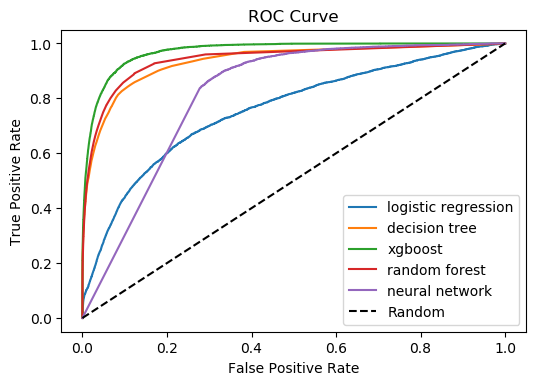

In [0]:
get_acc_rocauc([logi_model_pop, tree_model_pop, XGB_model_pop, ran_for_model_pop, nn_model_pop], ['logistic regression', 'decision tree', 'xgboost', 'random forest', 'neural network'], X_test, Y_pop_test)

Accuracy for logistic regression_hot = 0.982
AUC for logistic regression_hot = 0.557
Accuracy for decision tree_hot = 0.982
AUC for decision tree_hot = 0.873
Accuracy for xgboost_hot = 0.983
AUC for xgboost_hot = 0.943
Accuracy for random forest_hot = 0.985
AUC for random forest_hot = 0.949
Accuracy for neural network_hot = 0.982
AUC for neural network_hot = 0.500


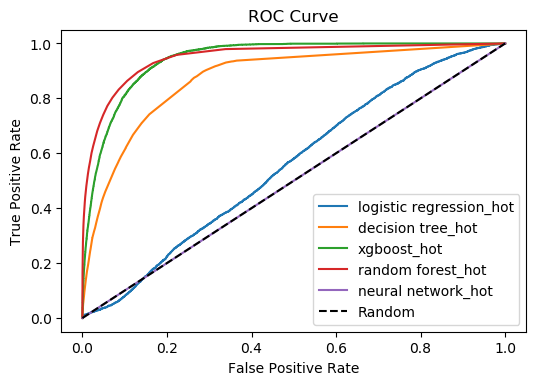

In [0]:
get_acc_rocauc([logi_model_hot, tree_model_hot, XGB_model_hot, ran_for_model_hot, nn_model_hot], ['logistic regression_hot', 'decision tree_hot', 'xgboost_hot', 'random forest_hot', 'neural network_hot'], X_test, Y_hot_test)

### PR-AUC

In [0]:
def get_prauc(models, names, X_test, Y_test):
    plt.rcParams['figure.dpi'] = 100
    for i in range(len(models)):
        model = models[i]
        name = names[i]
        Y_pred = model.predict(X_test)
        probs = model.predict_proba(X_test)[:,1]
        precision, recall, thresholds = metrics.precision_recall_curve(Y_test, probs)
        plt.plot(recall, precision, label=name)
        # plt.plot([0, 1], [0, 1], linestyle='dashed', color='black')
        plt.xlabel("Recall")
        plt.ylabel("Precision")
        plt.title("PR Curve")
        print ("average precision score for {0} = {1:.3f}".format(name, metrics.average_precision_score(Y_test, probs)))
        print ("PR-AUC for {0} = {1:.3f}".format(name, metrics.auc(recall, precision)))
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title("PR Curve")
    plt.legend()
    plt.show()

average precision score for logistic regression = 0.098
PR-AUC for logistic regression = 0.097
average precision score for decision tree = 0.485
PR-AUC for decision tree = 0.494
average precision score for xgboost = 0.591
PR-AUC for xgboost = 0.591
average precision score for random forest = 0.488
PR-AUC for random forest = 0.494
average precision score for neural network = 0.053
PR-AUC for neural network = 0.449


/Users/raychen/opt/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


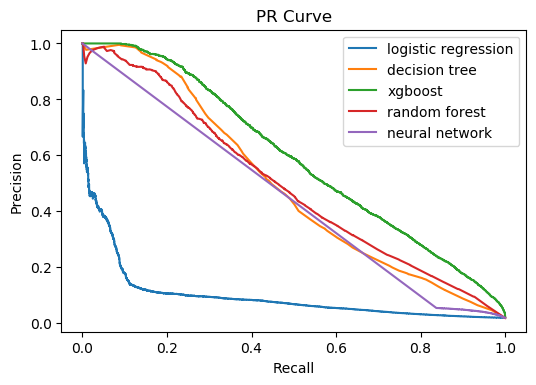

In [0]:
get_prauc([logi_model_pop, tree_model_pop, XGB_model_pop, ran_for_model_pop, nn_model_pop], ['logistic regression', 'decision tree', 'xgboost', 'random forest', 'neural network'], X_test, Y_pop_test)

average precision score for logistic regression_hot = 0.021
PR-AUC for logistic regression_hot = 0.021
average precision score for decision tree_hot = 0.141
PR-AUC for decision tree_hot = 0.149
average precision score for xgboost_hot = 0.285
PR-AUC for xgboost_hot = 0.284
average precision score for random forest_hot = 0.496
PR-AUC for random forest_hot = 0.505
average precision score for neural network_hot = 0.018
PR-AUC for neural network_hot = 0.509


/Users/raychen/opt/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


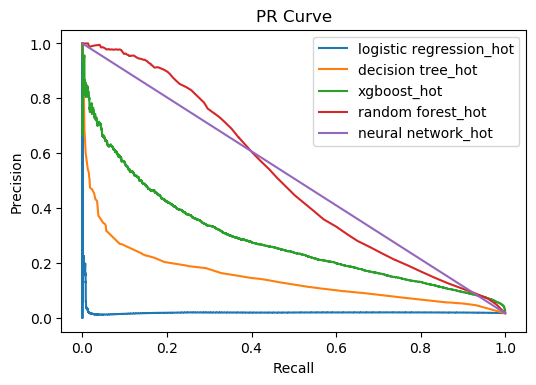

In [0]:
get_prauc([logi_model_hot, tree_model_hot, XGB_model_hot, ran_for_model_hot, nn_model_hot], ['logistic regression_hot', 'decision tree_hot', 'xgboost_hot', 'random forest_hot', 'neural network_hot'], X_test, Y_hot_test)

### confusion matrix

In [0]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [0]:
def get_confusion_matrix(model, name, X_test, Y_test):
    plt.rcParams['figure.dpi'] = 100
    Y_pred = model.predict(X_test)
    probs = model.predict_proba(X_test)[:,1]
    tn, fp, fn, tp = conf_mat = confusion_matrix(Y_test, Y_pred).ravel()
    conf_mat = [[tp, fp], [fn, tn]]
    return conf_mat

logistic regression:  [[194, 280], [4758, 258269]]
decision tree:  [[1330, 323], [3622, 258226]]
xgboost:  [[1580, 373], [3372, 258176]]
random forest:  [[1379, 512], [3573, 258037]]
neural network:  [[0, 0], [4952, 258549]]


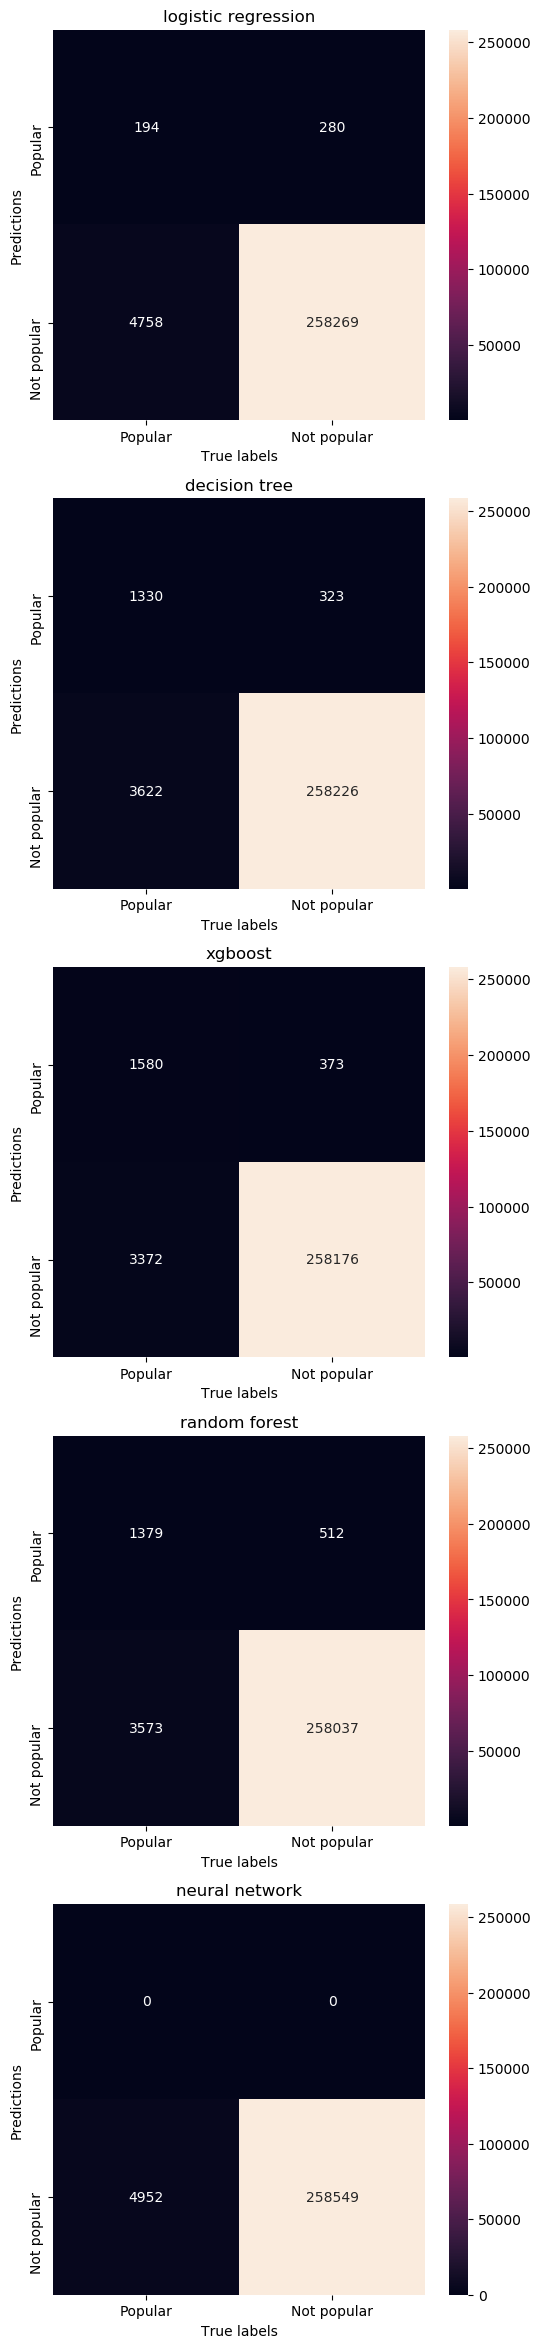

In [0]:
rows = 5
cols = 1
fig, axs = plt.subplots(ncols=cols, nrows=rows, figsize=(6*cols, 6*rows))
axs = axs.flatten()
tick_labels = ['Popular', 'Not popular']
models = [[logi_model_pop, tree_model_pop, XGB_model_pop, ran_for_model_pop, nn_model_pop], ['logistic regression', 'decision tree', 'xgboost', 'random forest', 'neural network']]
conf_mat_list = []
for i in range(len(models[0])):
  model = models[0][i]
  name = models[1][i]
  ax = axs[i]
  conf_mat = get_confusion_matrix(model, name, X_test, Y_pop_test)
  print(name + ': ', conf_mat)
  conf_mat_list.append([name, conf_mat])
  sns.heatmap(conf_mat, annot=True, fmt='d', yticklabels=tick_labels, xticklabels=tick_labels, ax=ax)
  ax.title.set_text(name)
  ax.set_xlabel('True labels')
  ax.set_ylabel('Predictions')

logistic regression_hot:  [[31, 125], [4588, 258757]]
decision tree_hot:  [[83, 92], [4536, 258790]]
xgboost_hot:  [[221, 112], [4398, 258770]]
random forest_hot:  [[666, 42], [3953, 258840]]
neural network_hot:  [[0, 0], [4619, 258882]]


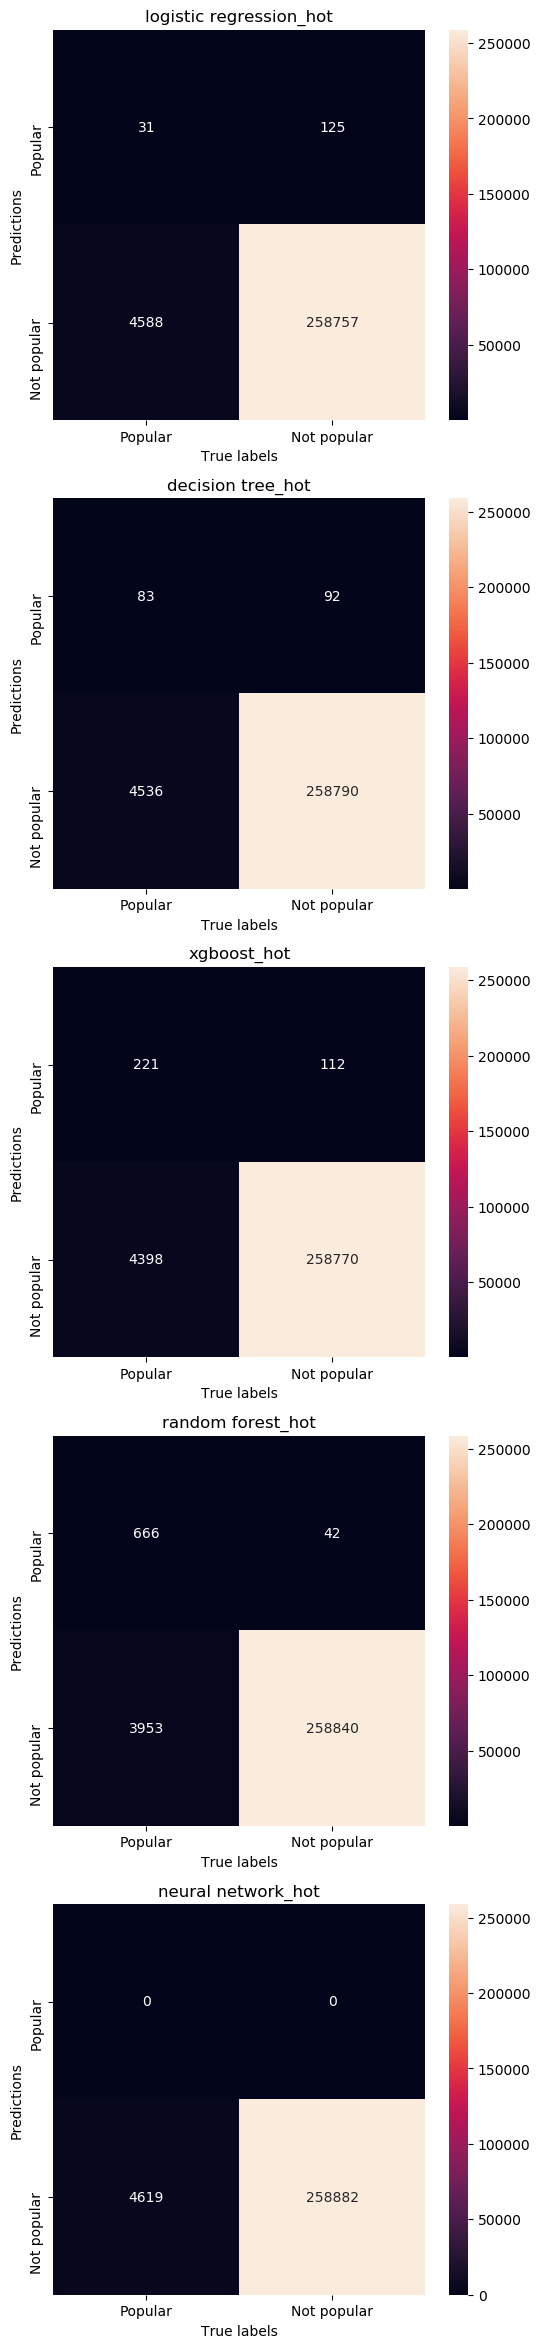

In [0]:
rows = 5
cols = 1
fig, axs = plt.subplots(ncols=cols, nrows=rows, figsize=(6*cols, 6*rows))
axs = axs.flatten()
tick_labels = ['Popular', 'Not popular']
models = [[logi_model_hot, tree_model_hot, XGB_model_hot, ran_for_model_hot, nn_model_hot], ['logistic regression_hot', 'decision tree_hot', 'xgboost_hot', 'random forest_hot', 'neural network_hot']]
conf_mat_list_hot = []
for i in range(len(models[0])):
  model = models[0][i]
  name = models[1][i]
  ax = axs[i]
  conf_mat = get_confusion_matrix(model, name, X_test, Y_hot_test)
  print(name + ': ', conf_mat)
  conf_mat_list_hot.append([name, conf_mat])
  sns.heatmap(conf_mat, annot=True, fmt='d', yticklabels=tick_labels, xticklabels=tick_labels, ax=ax)
  ax.title.set_text(name)
  ax.set_xlabel('True labels')
  ax.set_ylabel('Predictions')

## cost and benefits analysis
  - confusion matrix * cost matrix
  - profit curve


### confusion * cost matrix

In [0]:
conf_mat_list

[['logistic regression', [[194, 280], [4758, 258269]]],
 ['decision tree', [[1330, 323], [3622, 258226]]],
 ['xgboost', [[1580, 373], [3372, 258176]]],
 ['random forest', [[1379, 512], [3573, 258037]]],
 ['neural network', [[0, 0], [4952, 258549]]]]

In [0]:
conf_mat_list_hot

[['logistic regression_hot', [[31, 125], [4588, 258757]]],
 ['decision tree_hot', [[83, 92], [4536, 258790]]],
 ['xgboost_hot', [[221, 112], [4398, 258770]]],
 ['random forest_hot', [[666, 42], [3953, 258840]]],
 ['neural network_hot', [[0, 0], [4619, 258882]]]]

In [0]:
conf_mat_list[0]

['logistic regression', [[194, 280], [4758, 258269]]]

In [0]:
unit_cost_small = 500
cost_to_revenue = 0.26
unit_revenue_small = round(unit_cost_small/cost_to_revenue)
cost_matrix_small = np.array([[unit_revenue_small - unit_cost_small, - unit_cost_small], [0, 0]])
cost_matrix_small

array([[1423, -500],
       [   0,    0]])

In [0]:
unit_cost_large = 2000
cost_to_revenue = 0.26
unit_revenue_large = round(unit_cost_large/cost_to_revenue)
cost_matrix_large = np.array([[unit_revenue_large - unit_cost_large, - unit_cost_large], [0, 0]])
cost_matrix_large

array([[ 5692, -2000],
       [    0,     0]])

In [0]:
for i in range(len(conf_mat_list)):
  conf_mat = conf_mat_list[i][1]
  name = conf_mat_list[i][0]
  print("Revenue with lower cost using" , name, ": ", (conf_mat * cost_matrix_small).sum())
  print("Revenue with larger cost using" , name, ": ",  (conf_mat * cost_matrix_large).sum())
  print('\n')

Revenue with lower cost using logistic regression :  136062
Revenue with larger cost using logistic regression :  544248


Revenue with lower cost using decision tree :  1731090
Revenue with larger cost using decision tree :  6924360


Revenue with lower cost using xgboost :  2061840
Revenue with larger cost using xgboost :  8247360


Revenue with lower cost using random forest :  1706317
Revenue with larger cost using random forest :  6825268


Revenue with lower cost using neural network :  0
Revenue with larger cost using neural network :  0




**For Spotify popularity as our target variable, it looks like XGBoost is the best classifier among 5 for now. XGBoost is not an excellent classifier but it has the most best in accuracy, roc-auc, precision score, and cost-benefits.**

In [0]:
for i in range(len(conf_mat_list_hot)):
  conf_mat = conf_mat_list_hot[i][1]
  name = conf_mat_list_hot[i][0]
  print("Revenue with lower cost using" , name, ": ", (conf_mat * cost_matrix_small).sum())
  print("Revenue with larger cost using" , name, ": ",  (conf_mat * cost_matrix_large).sum())
  print('\n')

Revenue with lower cost using logistic regression_hot :  -18387
Revenue with larger cost using logistic regression_hot :  -73548


Revenue with lower cost using decision tree_hot :  72109
Revenue with larger cost using decision tree_hot :  288436


Revenue with lower cost using xgboost_hot :  258483
Revenue with larger cost using xgboost_hot :  1033932


Revenue with lower cost using random forest_hot :  926718
Revenue with larger cost using random forest_hot :  3706872


Revenue with lower cost using neural network_hot :  0
Revenue with larger cost using neural network_hot :  0




**For billboard hot as our target variable, it looks like this is not a good choice of target variable OR it could be the we collect the data makes it not predictive. No classifier predicts well.**

### profit curve

In [0]:
unit_cost_small = 500
cost_to_revenue = 0.26
unit_revenue_small = round(unit_cost_small/cost_to_revenue)

In [0]:
unit_revenue_small

1923

In [0]:
unit_cost_large = 2000
cost_to_revenue = 0.26
unit_revenue_large = round(unit_cost_large/cost_to_revenue)

In [0]:
def profit_curve(models, labels, X_test, Y_test, unit_revenue, unit_cost, plot_range):
  for i in range(len(models)):
    model = models[i]
    label = labels[i]
    probs = model.predict_proba(X_test)[:, 1]

    expected_unit_profit = unit_revenue * probs - unit_cost
    X_test_2 = pd.concat([X_test, pd.DataFrame(np.array(expected_unit_profit), index = X_test.index, columns = ["expected_unit_profit"])], axis = 1)
    # Sort these probabilities and the true value in descending order of probability
    X_test_2_sorted = X_test_2.sort_values(by = "expected_unit_profit", ascending=False)
    order = np.argsort(X_test_2["expected_unit_profit"])[::-1]
    Y_test_sorted = np.array(Y_test)[order]

    # Build the cumulative response curve
    x_cumulative = np.arange(len(Y_test_sorted)) + 1
    y_cumulative = np.cumsum(Y_test_sorted)

    # Rescale
    scale = 100
    x_cumulative = np.array(x_cumulative)/float(x_cumulative.max()) * scale
    y_cumulative = np.array(y_cumulative)/float(y_cumulative.max()) * scale

    X_test_2_sorted["profit_CumSum"] = np.cumsum(X_test_2_sorted["expected_unit_profit"])

    # Expected total profit
    print(label)
    print("Maximum Expected Profit (in thousand USD):", round(X_test_2_sorted["profit_CumSum"].max()))
    print("with target at:", X_test_2_sorted["profit_CumSum"].reset_index(drop=True).idxmax(), "songs ranked by expected unit profit")
    print('\n')

    # custmers targeted
    plt.plot(x_cumulative[:plot_range], X_test_2_sorted["profit_CumSum"][:plot_range], label=label)

  # Plot other details
  plt.xlabel("Percentage of users targeted")
  plt.ylabel("Profit")
  plt.title("Profit curve")
  plt.legend()
  plt.show()

logistic regression
Maximum Expected Profit (in thousand USD): 551390
with target at: 1145 songs ranked by expected unit profit


decision tree
Maximum Expected Profit (in thousand USD): 2189997
with target at: 3874 songs ranked by expected unit profit


xgboost
Maximum Expected Profit (in thousand USD): 2400978
with target at: 4289 songs ranked by expected unit profit


random forest
Maximum Expected Profit (in thousand USD): 2182605
with target at: 4287 songs ranked by expected unit profit


neural network
Maximum Expected Profit (in thousand USD): -393
with target at: 0 songs ranked by expected unit profit




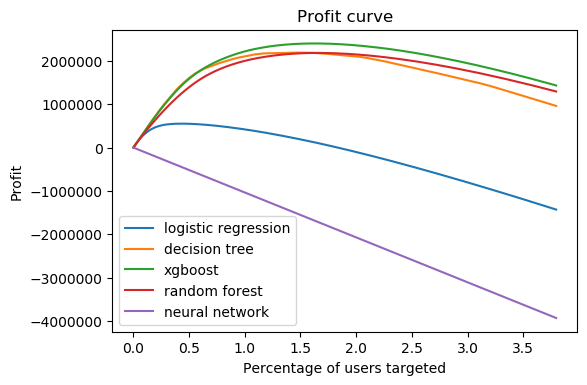

In [0]:
profit_curve([logi_model_pop, tree_model_pop, XGB_model_pop, ran_for_model_pop, nn_model_pop], ['logistic regression', 'decision tree', 'xgboost', 'random forest', 'neural network'], X_test, Y_pop_test, unit_revenue_small, unit_cost_small, 10000)

logistic regression_hot
Maximum Expected Profit (in thousand USD): 422906
with target at: 2534 songs ranked by expected unit profit


decision tree_hot
Maximum Expected Profit (in thousand USD): 215823
with target at: 758 songs ranked by expected unit profit


xgboost_hot
Maximum Expected Profit (in thousand USD): 510538
with target at: 2189 songs ranked by expected unit profit


random forest_hot
Maximum Expected Profit (in thousand USD): 821206
with target at: 2189 songs ranked by expected unit profit


neural network_hot
Maximum Expected Profit (in thousand USD): -466
with target at: 0 songs ranked by expected unit profit




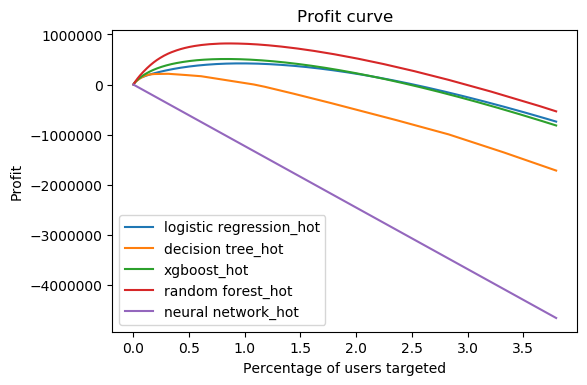

In [0]:
profit_curve([logi_model_hot, tree_model_hot, XGB_model_hot, ran_for_model_hot, nn_model_hot], ['logistic regression_hot', 'decision tree_hot', 'xgboost_hot', 'random forest_hot', 'neural network_hot'], X_test, Y_hot_test, unit_revenue_small, unit_cost_small, 10000)

logistic regression
Maximum Expected Profit (in thousand USD): 2205558
with target at: 1145 songs ranked by expected unit profit


decision tree
Maximum Expected Profit (in thousand USD): 8759990
with target at: 3874 songs ranked by expected unit profit


xgboost
Maximum Expected Profit (in thousand USD): 9603912
with target at: 4289 songs ranked by expected unit profit


random forest
Maximum Expected Profit (in thousand USD): 8730419
with target at: 4287 songs ranked by expected unit profit


neural network
Maximum Expected Profit (in thousand USD): -1572
with target at: 0 songs ranked by expected unit profit




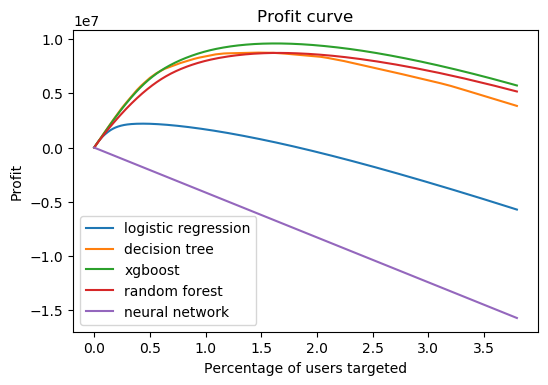

In [0]:
profit_curve([logi_model_pop, tree_model_pop, XGB_model_pop, ran_for_model_pop, nn_model_pop], ['logistic regression', 'decision tree', 'xgboost', 'random forest', 'neural network'], X_test, Y_pop_test, unit_revenue_large, unit_cost_large, 10000)

logistic regression_hot
Maximum Expected Profit (in thousand USD): 1691626
with target at: 2534 songs ranked by expected unit profit


decision tree_hot
Maximum Expected Profit (in thousand USD): 863292
with target at: 758 songs ranked by expected unit profit


xgboost_hot
Maximum Expected Profit (in thousand USD): 2042151
with target at: 2189 songs ranked by expected unit profit


random forest_hot
Maximum Expected Profit (in thousand USD): 3284826
with target at: 2189 songs ranked by expected unit profit


neural network_hot
Maximum Expected Profit (in thousand USD): -1864
with target at: 0 songs ranked by expected unit profit




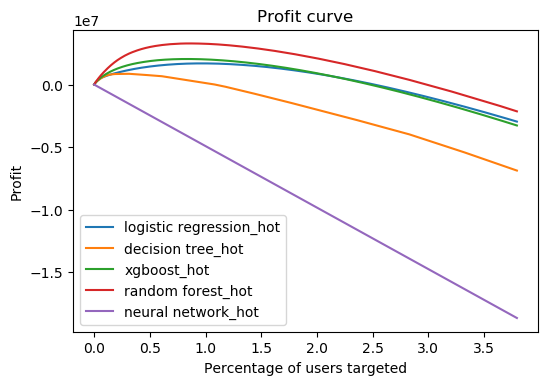

In [0]:
profit_curve([logi_model_hot, tree_model_hot, XGB_model_hot, ran_for_model_hot, nn_model_hot], ['logistic regression_hot', 'decision tree_hot', 'xgboost_hot', 'random forest_hot', 'neural network_hot'], X_test, Y_hot_test, unit_revenue_large, unit_cost_large, 10000)